In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.optimizers import RMSprop
import cv2
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


# **Extracting Data from uploaded Zipfile**

In [ ]:
from zipfile import ZipFile
file_name = 'archive.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Auto labelling Data**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255
)


train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 128
)


Found 28709 images belonging to 7 classes.


# **View the data**

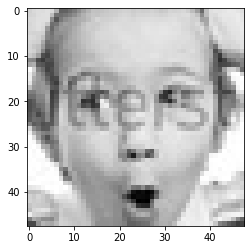

In [ ]:
img_array = cv2.imread('/content/train/surprise/Training_10073433.jpg')
plt.imshow(img_array)

# **Model**

In [ ]:
model = tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = tf.keras.layers.Dense(128, activation='relu')(base_output)
final_output = tf.keras.layers.Dense(64, activation='relu')(final_output)
final_output = tf.keras.layers.Dense(7, activation='softmax')(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
final_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
final_model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [ ]:
history = final_model.fit(
    train_generator,
    epochs = 15
)

Epoch 1/15
225/225 [==============================] - 215s 781ms/step - loss: 1.2455 - accuracy: 0.5308
Epoch 2/15
225/225 [==============================] - 181s 805ms/step - loss: 1.0077 - accuracy: 0.6253
Epoch 3/15
225/225 [==============================] - 182s 808ms/step - loss: 0.8937 - accuracy: 0.6694
Epoch 4/15
225/225 [==============================] - 182s 808ms/step - loss: 0.7995 - accuracy: 0.7027
Epoch 5/15
225/225 [==============================] - 182s 808ms/step - loss: 0.7066 - accuracy: 0.7412
Epoch 6/15
225/225 [==============================] - 182s 808ms/step - loss: 0.6237 - accuracy: 0.7690
Epoch 7/15
225/225 [==============================] - 182s 808ms/step - loss: 0.5488 - accuracy: 0.8007
Epoch 8/15
225/225 [==============================] - 182s 810ms/step - loss: 0.4932 - accuracy: 0.8221
Epoch 9/15
225/225 [==============================] - 183s 814ms/step - loss: 0.4293 - accuracy: 0.8451
Epoch 10/15
225/225 [==============================] - 182s 807m

# **Face Detection**

We have used haarcascade for face detection here. Face detection will be very useful if the model were to recognize emotions using a webcam however since this is a colab notebook I cannot use OpenCV to access my webcam

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2021-07-02 19:15:31--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-07-02 19:15:31 (20.6 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



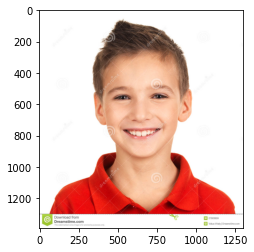

In [ ]:
base_image = cv2.imread('/content/happy boy.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

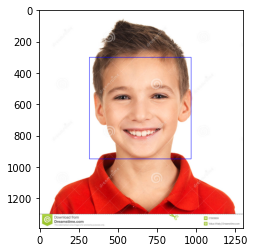

In [ ]:
test_image = cv2.imread('/content/happy boy.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     roi_gray = grey[y:y+h, x:x+w]
     roi_color = test_image[y:y+h, x:x+w]
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
     facess = face_cascade.detectMultiScale(roi_gray)
     if len(facess) == 0:
       print('face not detected')
     else:
       for (ex,ey,ew,eh) in facess :
         face_roi = roi_color[ey: ey+eh, ex: ex+ew]     
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

crop the image so that the model does not have to look at the background

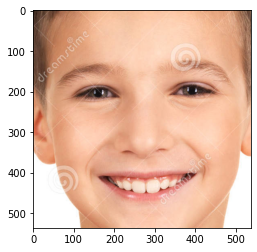

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

# **Categories**
0 - angry,
1 - disgust,
2 - fear,
3 - happy,
4 - neutral,
5 - sad, 
6 - surprise

In [ ]:
prediction = final_model.predict(final_image)
np.argmax(prediction)

3